# Project Foundations for Data Science: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# read the data
data = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? 

In [5]:
# Write your code here
data.shape

(1898, 9)

#### Observations: Our data has 1898 rows and 9 columns
 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
# Use info() to print a concise summary of the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: In our data, features ordere_id, customer_id, food_preparation_time, delivery_time are intizers, cost of th eorder being float and rest of them are characters(object)


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.


In [7]:
# Write your code here1`
data.isna()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1893,False,False,False,False,False,False,False,False,False
1894,False,False,False,False,False,False,False,False,False
1895,False,False,False,False,False,False,False,False,False
1896,False,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values in our data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [9]:
# Write your code here

data.corr()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


In [10]:
data.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [11]:
#### from the above table we can see the munimum, avg and maximmum time taken to prepare the food can be found. They are 
#### avg food_preparation_time = 27 mins, minimum food_preparation_time = 20 mins, max food_preaparation_time = 35 mins

#### Observations: order_id and customer_id being nominal data, Average cost_of_the_order  is about 16.5 and food_preparation and delivery_time average being roughly around 25 minutes


### **Question 5:** How many orders are not rated?

In [12]:
data.columns
data = pd.DataFrame(data)

In [17]:
no_rating_count = 0
for each_rating in data['rating']:
    if each_rating == 'Not given':
        no_rating_count = no_rating_count + 1
      

#### Running below line will print all the 736 records, for the enhancement and readibility, I've put itlike below. you may try running it 

In [18]:
# print(no_rating_count)   

#### Observations: There are 736 records that are not rated in the given dataset.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

In [19]:
# since order_id and customer_id are nominal and doesn't hold any value other than distinction,
# we will be focusing majorlly on the other fetaues in the dataset
# variables that will we are going to explore and bring insights are 
# restaurant_name, cusine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, delivery_time

Text(0, 0.5, 'Number of orders placed')

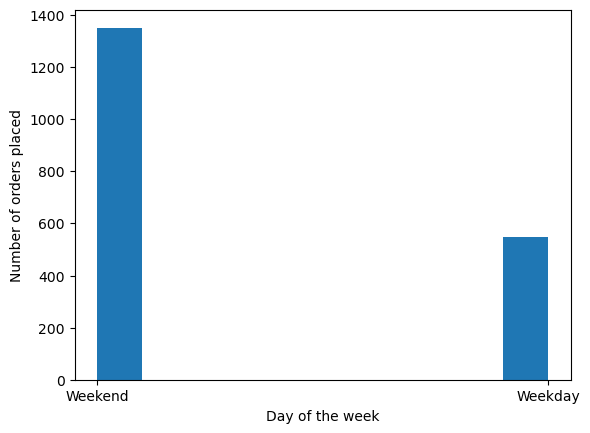

In [20]:
plt.hist(data['day_of_the_week'])
plt.xlabel("Day of the week")
plt.ylabel("Number of orders placed")

### From the above bar-chart we can see that number of orders on weekends are high compared to the weekdays.


Text(0, 0.5, 'number of orders')

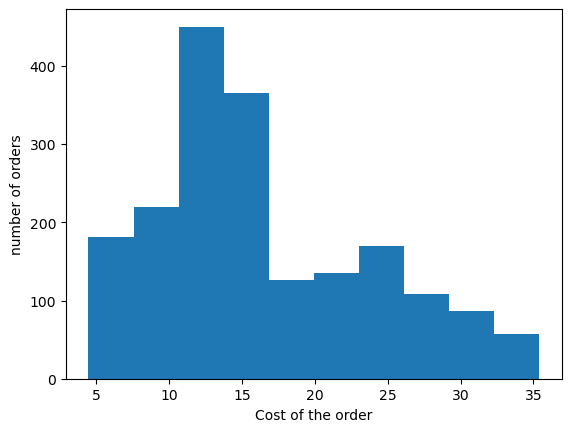

In [21]:
plt.hist(data['cost_of_the_order'])
plt.xlabel("Cost of the order")
plt.ylabel("number of orders")

### From the above histogram we can say that majority of the orders are inbetween the price of range 10 dollars to 16 dollars.

In [22]:
print(data['cuisine_type'].unique())

['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


### There are a total of 14 cuisines in the foodhub dataset

<AxesSubplot:xlabel='count', ylabel='cuisine_type'>

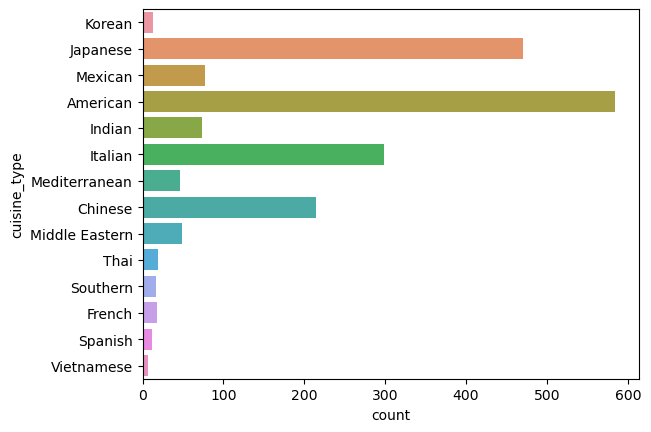

In [23]:
sns.countplot(y=data['cuisine_type'], orient = 'v')


### From the above count plot, it's obvious that most of the orders were from American, Japanese, Italian and Chinese.

Text(0, 0.5, 'Number of orders')

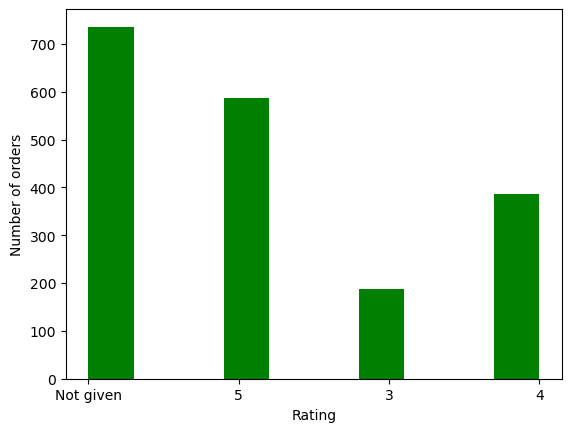

In [24]:
plt.hist(data['rating'], color = ['green'])
plt.xlabel('Rating')
plt.ylabel('Number of orders')

### Above graph shows ratings given by customers on x-axis with number of orders on y-axis

Text(0, 0.5, 'Number of orders')

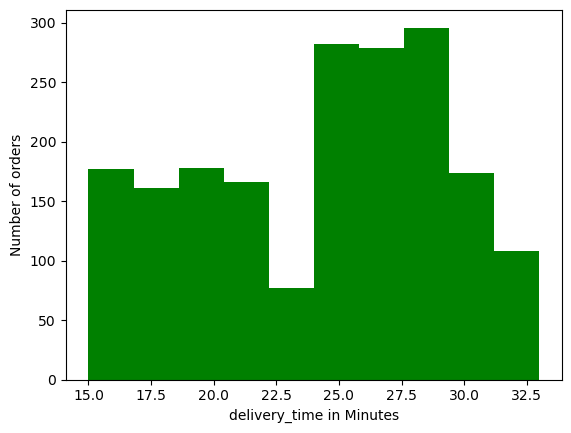

In [25]:
plt.hist(data['delivery_time'], color = ['green'])
plt.xlabel('delivery_time in Minutes')
plt.ylabel('Number of orders')

### Above graph shows the delivery time on x-axis with number of orders on y-axis

Text(0, 0.5, 'Number of orders')

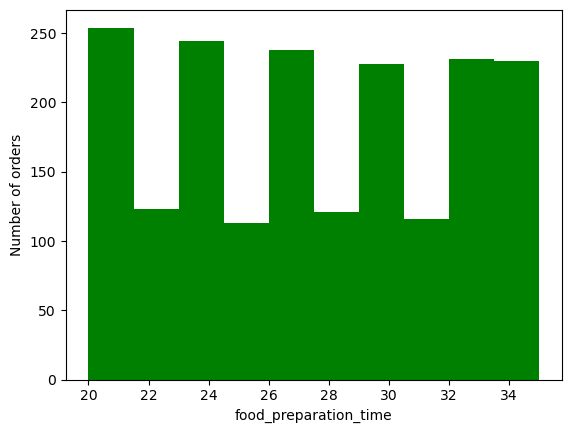

In [26]:
plt.hist(data['food_preparation_time'], color = ['green'])
plt.xlabel('food_preparation_time')
plt.ylabel('Number of orders')

### Above graph shows the food preparation time in x-axis with number of orders on y-axis

####   ==================================================================================================== ####

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

In [27]:
# first let's find out the distinct restaurants in the dataset
restaurants_list = data['restaurant_name'].unique()
len(restaurants_list)

178

In [33]:
# Below is the list of restaruants according to orders placed
#for each_restaurant in data['restaurant_name']:
#   print(each_restaurant)

In [34]:
### Below is the list of distinct restaurants.
count_each_restaurant = data['restaurant_name'].value_counts()
count_each_restaurant


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

### Observations: The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm.

### **Question 8**: Which is the most popular cuisine on weekends?

In [35]:
# Filtering data based on the day of the week.

weekend_data = data.query("day_of_the_week == 'Weekend'")
weekend_data.head(10)


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
13,1477449,104548,Pylos,Mediterranean,11.30,Weekend,3,24,23
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
16,1477486,104555,Sushi of Gari,Japanese,16.98,Weekend,Not given,30,16
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22


In [36]:
count_each_cuisinetype = weekend_data['cuisine_type'].value_counts()
count_each_cuisinetype

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: American, Japanese, Chinese, Mixican and Indian are the top five restanurants on weekends in terms of number of orders placed


### **Question 9**: What percentage of the orders cost more than 20 dollars? 

Text(0, 0.5, 'number of orders')

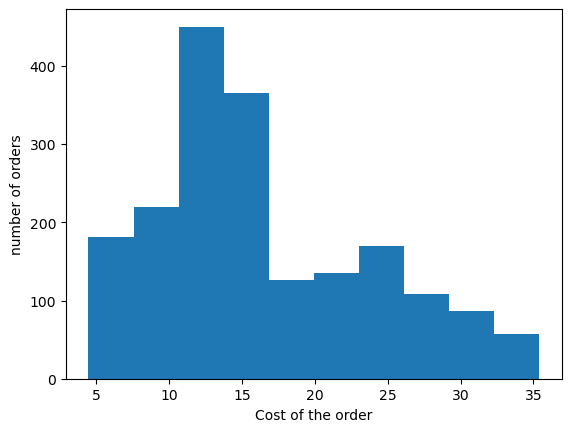

In [37]:
# Write the code here
#Visual insepection of the cost_of_orders using an histogram

plt.hist(data['cost_of_the_order'])
plt.xlabel("Cost of the order")
plt.ylabel("number of orders")


In [38]:
# Calculating the percentage

percentage_of_every_order = (data['cost_of_the_order'] / data['cost_of_the_order'].sum()) * 100
percentage_of_every_order

0       0.098196
1       0.038576
2       0.039055
3       0.093247
4       0.037011
          ...   
1893    0.071244
1894    0.038895
1895    0.080537
1896    0.038895
1897    0.062111
Name: cost_of_the_order, Length: 1898, dtype: float64

In [39]:
greater_than_20 = data[data['cost_of_the_order']>20]
greater_than_20

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


Text(0, 0.5, 'number of orders')

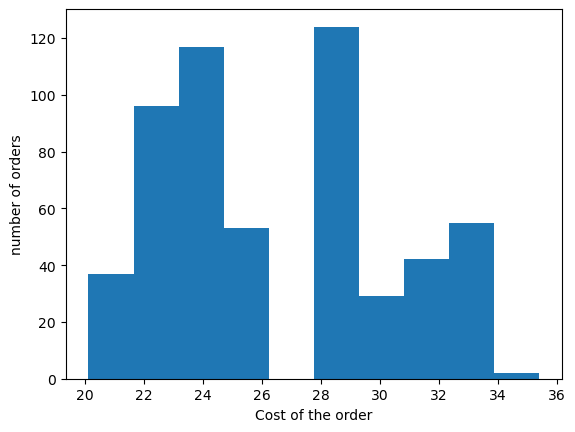

In [40]:
plt.hist(greater_than_20['cost_of_the_order'])
plt.xlabel("Cost of the order")
plt.ylabel("number of orders")

In [41]:
percentage =(greater_than_20.shape[0] / data.shape[0]) * 100
percentage

29.24130663856691

#### Observations: Roughly 30% of the orders placed are above 20 USD.


### **Question 10**: What is the mean order delivery time?

24.161749209694417

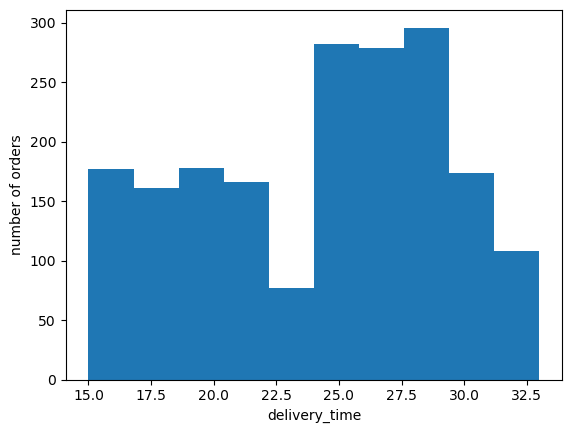

In [42]:
# Write the code here
plt.hist(data['delivery_time'])
plt.xlabel("delivery_time")
plt.ylabel("number of orders")


Avg_order_delivery_time = data['delivery_time'].mean()
Avg_order_delivery_time

#### Observations: Average delivery time of the orders is 24 minutes, but most of the orders are delivered between 25 to 30 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [43]:
# Write the code here

frequent_customer = data['customer_id'].value_counts()
frequent_customer[0:3]


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: customer 52832  placed 13 orders, which is most by any customer, followed by 47440 and 83287 with 10 and 9 orders respectively.

 

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) 


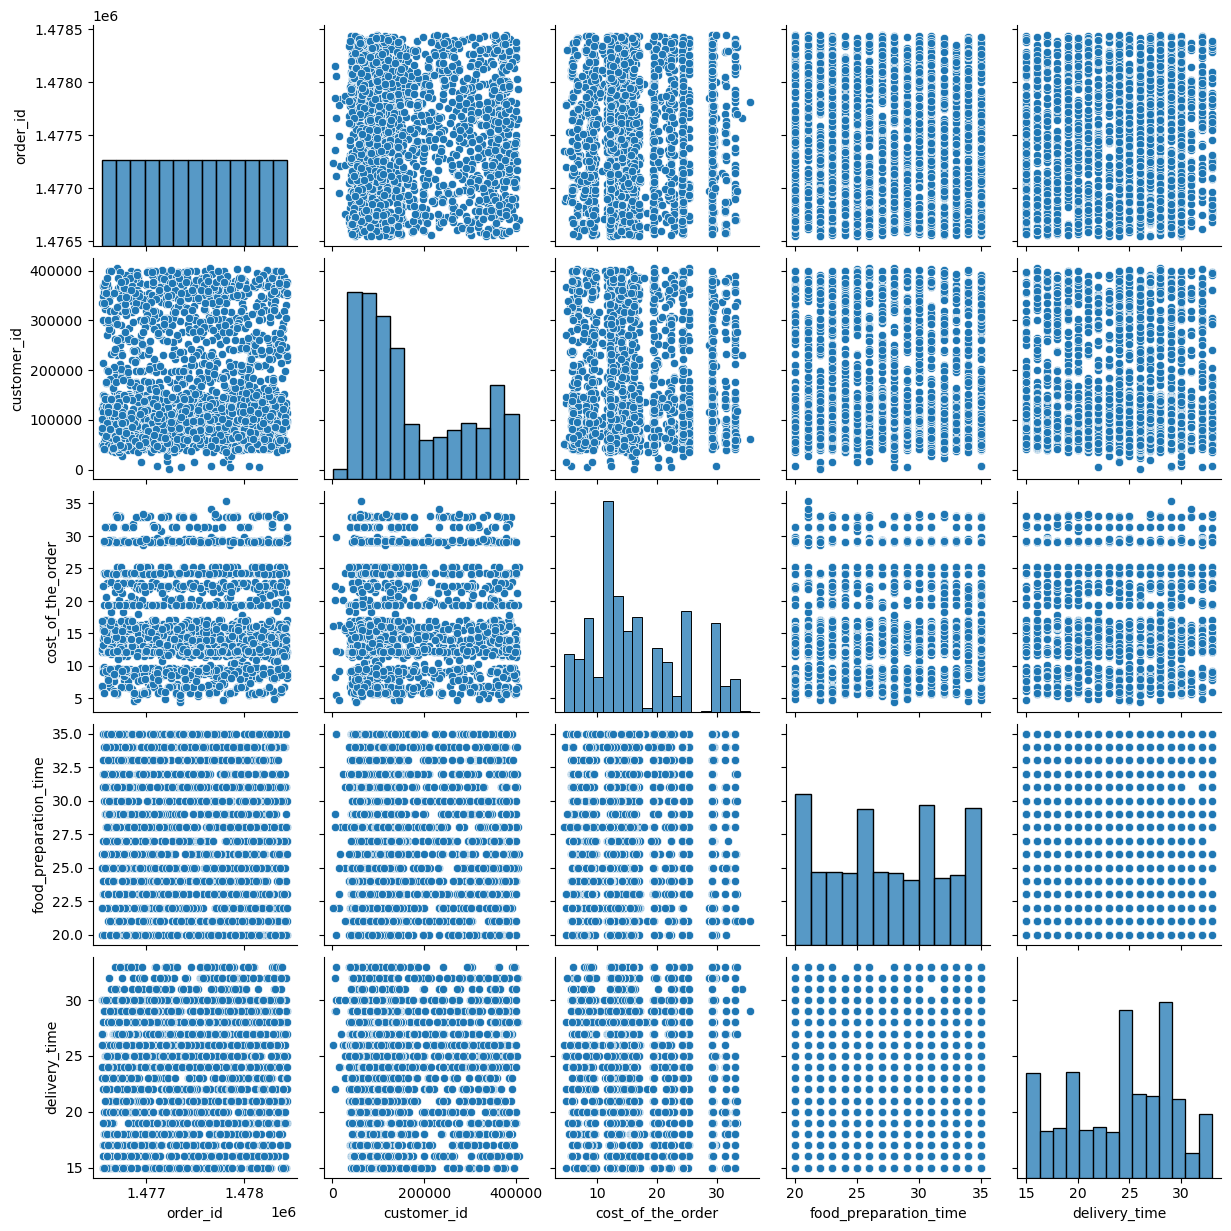

In [44]:
# Write the code here


sns.pairplot(data)


###The below correlation plot shows the relation btw all the numerical variables, here from the below plot order_id can be 
### though of as like a categorical, since it doesn't possess any transformations. Other vaiables seems like they are not poseesimng any correlatoin.
### As the each individual pair plot seems like uniformly distributed.


In [45]:
data.corr()



,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


#### If the coorelation between the variables is closer to zero, They are not showing any significant relationship.
#### From the below table, correlation coefficient values between the variables are pretty close to zero, proving there isn't any relationship or lineratiy between the vaiables

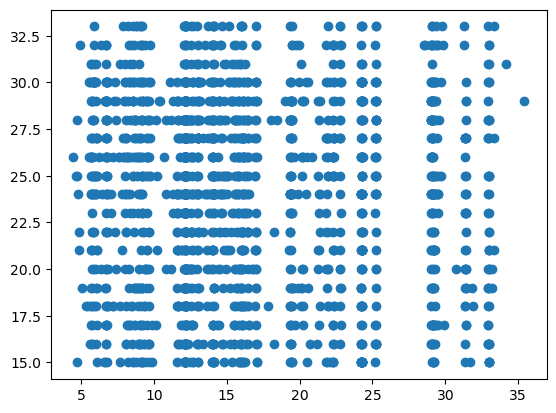

In [46]:
### Let's find the correlation between cost_of_the_order and delivery_time.

plt.scatter(data['cost_of_the_order'], data['delivery_time'])

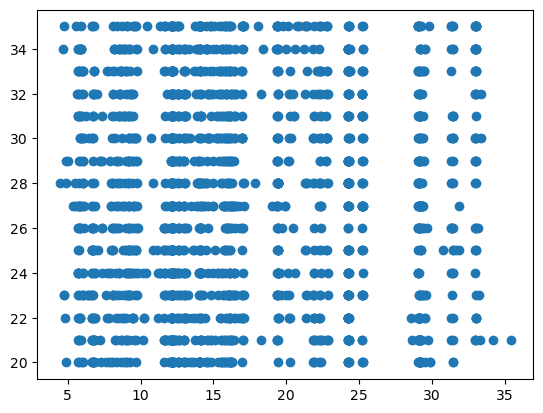

In [47]:
plt.scatter(data['cost_of_the_order'], data['food_preparation_time'])

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. 

In [48]:
data_rated = data[data['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
data_rated['rating'] = data_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
data_rating_count = data_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
data_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [49]:
rest_names = data_rating_count['restaurant_name'] # Complete the code to get the restaurant names having rating count more than 50
rest_names

0                    Shake Shack
1              The Meatball Shop
2              Blue Ribbon Sushi
3      Blue Ribbon Fried Chicken
4               RedFarm Broadway
                 ...            
151             Frank Restaurant
152          Socarrat Paella Bar
153              El Parador Cafe
154                 Lucky Strike
155                   'wichcraft
Name: restaurant_name, Length: 156, dtype: object

In [50]:

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = data_rated[data_rated['restaurant_name'].isin(rest_names)].copy()
df_mean_4

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [51]:

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() # Complete the code to find the mean rating

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
...,...,...
151,Woorijip,3.0
152,Byblos Restaurant,3.0
153,Pepe Giallo,3.0
154,Sushi Choshi,3.0


#### Observations: No restauranat qualifies for the promotion, since no restaurant meets the given condition.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [53]:
# Write the code here

for cost in data['cost_of_the_order']:
    if cost > 5 and cost < 20 :
        print("15% Charge: " ,cost)
    if cost > 20 :
        print("25% Charge: ", cost)
  

25% Charge:  30.75
15% Charge:  12.08
15% Charge:  12.23
25% Charge:  29.2
15% Charge:  11.59
25% Charge:  25.22
15% Charge:  6.07
15% Charge:  5.97
15% Charge:  16.44
15% Charge:  7.18
15% Charge:  5.92
15% Charge:  8.1
25% Charge:  24.3
15% Charge:  11.3
15% Charge:  12.13
15% Charge:  16.2
15% Charge:  16.98
25% Charge:  33.03
15% Charge:  14.12
15% Charge:  16.2
25% Charge:  24.2
15% Charge:  15.91
25% Charge:  29.1
15% Charge:  8.92
15% Charge:  15.86
25% Charge:  29.1
25% Charge:  21.88
15% Charge:  14.02
15% Charge:  9.17
15% Charge:  12.18
25% Charge:  31.33
25% Charge:  29.05
15% Charge:  8.39
15% Charge:  9.12
25% Charge:  29.1
15% Charge:  15.47
15% Charge:  16.01
25% Charge:  24.3
25% Charge:  29.83
15% Charge:  19.89
15% Charge:  19.35
25% Charge:  33.22
25% Charge:  24.25
15% Charge:  16.44
25% Charge:  22.75
15% Charge:  6.74
25% Charge:  29.05
15% Charge:  13.78
15% Charge:  19.89
15% Charge:  16.93
25% Charge:  21.88
25% Charge:  29.39
25% Charge:  20.23
25% Charge:  2

In [54]:
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

data['Revenue'] = data['cost_of_the_order'].apply(compute_rev) # Write the apprpriate column name to compute the revenue
data.head()

sum(data['Revenue'])

6166.302999999994

#### Observations: The total revenue generated by the company across all orders is 6166 Dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [55]:
## let's find out the total delivery time for each order 
data['Total_time'] = data['food_preparation_time'] + data['delivery_time']
data['Total_time']

0       45
1       48
2       51
3       40
4       49
        ..
1893    48
1894    50
1895    55
1896    54
1897    52
Name: Total_time, Length: 1898, dtype: int64

Text(0, 0.5, 'number of orders')

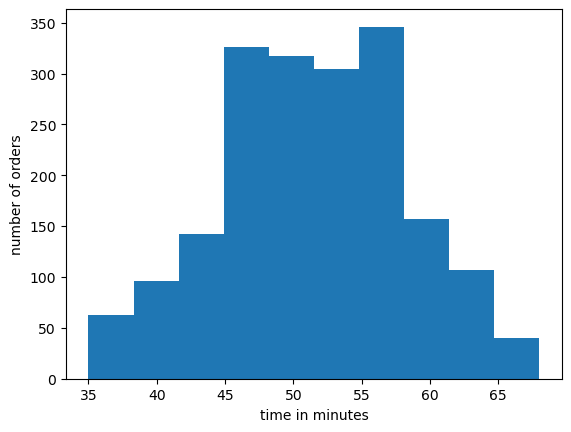

In [56]:
# Let's do visual inspection on the total_time variable. 

plt.hist(data['Total_time'])
plt.xlabel("time in minutes")
plt.ylabel("number of orders")



##### We can see there were some orderes from the right tail that represents orders that took more than 60 minutes to get delivered since the time order placed


In [57]:
time_greater_than_60 = data[data['Total_time']>60]
time_greater_than_60

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,Total_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,0.8880,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,2.4300,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,2.3790,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,5.6875,64
...,...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,2.9100,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,5.5775,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,1.8345,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,2.0955,62


In [58]:
Greater_than_60_min_delivery_time_percentage = time_greater_than_60.shape[0]/data.shape[0]
Greater_than_60_min_delivery_time_percentage

0.1053740779768177

#### Observations: 10% of the orders were delivered after 60 mins.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? 

In [59]:
# Write the code here
weekend_data = data.query("day_of_the_week == 'Weekend'")
weekend_data.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,Total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.9105,49
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22,1.2150,45
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,6.0750,40
13,1477449,104548,Pylos,Mediterranean,11.30,Weekend,3,24,23,1.6950,47
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25,2.4300,58
16,1477486,104555,Sushi of Gari,Japanese,16.98,Weekend,Not given,30,16,2.5470,46
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,8.2575,43


In [60]:
weekday_data = data.query("day_of_the_week == 'Weekday'")
weekday_data

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,Total_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.3050,44
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955,63
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,2.4660,47
...,...,...,...,...,...,...,...,...,...,...,...
1878,1477194,62540,Blue Ribbon Sushi,Japanese,5.92,Weekday,Not given,27,31,0.8880,58
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29,7.2625,56
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30,1.3020,63
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.3050,55


In [61]:
mean_delivery_time_weekdays = weekday_data['delivery_time'].mean()
mean_delivery_time_weekdays

28.340036563071298

In [62]:
mean_delivery_time_weekend = weekend_data['delivery_time'].mean()
mean_delivery_time_weekend

22.4700222057735

#### Observations: The average deilvery time on weekends is low compared to the average delivery time on weekdays


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) 

### Conclusions:
#### There is no coorelation between the variables, having more data with some other features might be helpful.
#### Top 5 restaurants and cuisines are found from the analysis. 
#### Avg delivery time on weekends is low.
#### Cost of the orders total time taken to deliver the food from the time order placed follows roughly a normal distribution.

### Recommendations:

#### Company should hire more delivery drivers during the weekdays, since the average delivery time is high during weekdays.
#### Foodhub should promote or give discounts on 1. Shake Shack	2. The Meatball Shop 3. Blue Ribbon Sushi	4. Blue Ribbon Fried Chicken	5. RedFarm Broadway	
#### Also consider promoting offers on AMERICAN, JAPANESE, ITALIAN, CHINESE cuisines.
#### Food hub should hire more delivery drivers, so that It can deliver more fastly.
#### To boost it's business, it should also promote restaurants with less food_preparation_time.


---